* The code might have different syntax as compared to what professor has used, this is because of few updates in the used library

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.impute import SimpleImputer

from sklearn.tree import DecisionTreeClassifier



pima_df = pd.read_csv("/content/drive/MyDrive/Python Course/Model Tuning/Week 1 _ Feature Engineering and Cross Validation/pima-indians-diabetes.csv")



pima_df[['Plas', 'Pres', 'skin', 'test', 'mass', 'pedi', 'age']] = pima_df[['Plas', 'Pres', 'skin', 'test', 'mass', 'pedi', 'age']].replace(0, np.nan)

pima_df.head(50)

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
5,5,116.0,74.0,NaN,NaN,25.6,0.201,30,0
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1
7,10,115.0,NaN,NaN,NaN,35.3,0.134,29,0
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1
9,8,125.0,96.0,NaN,NaN,NaN,0.232,54,1


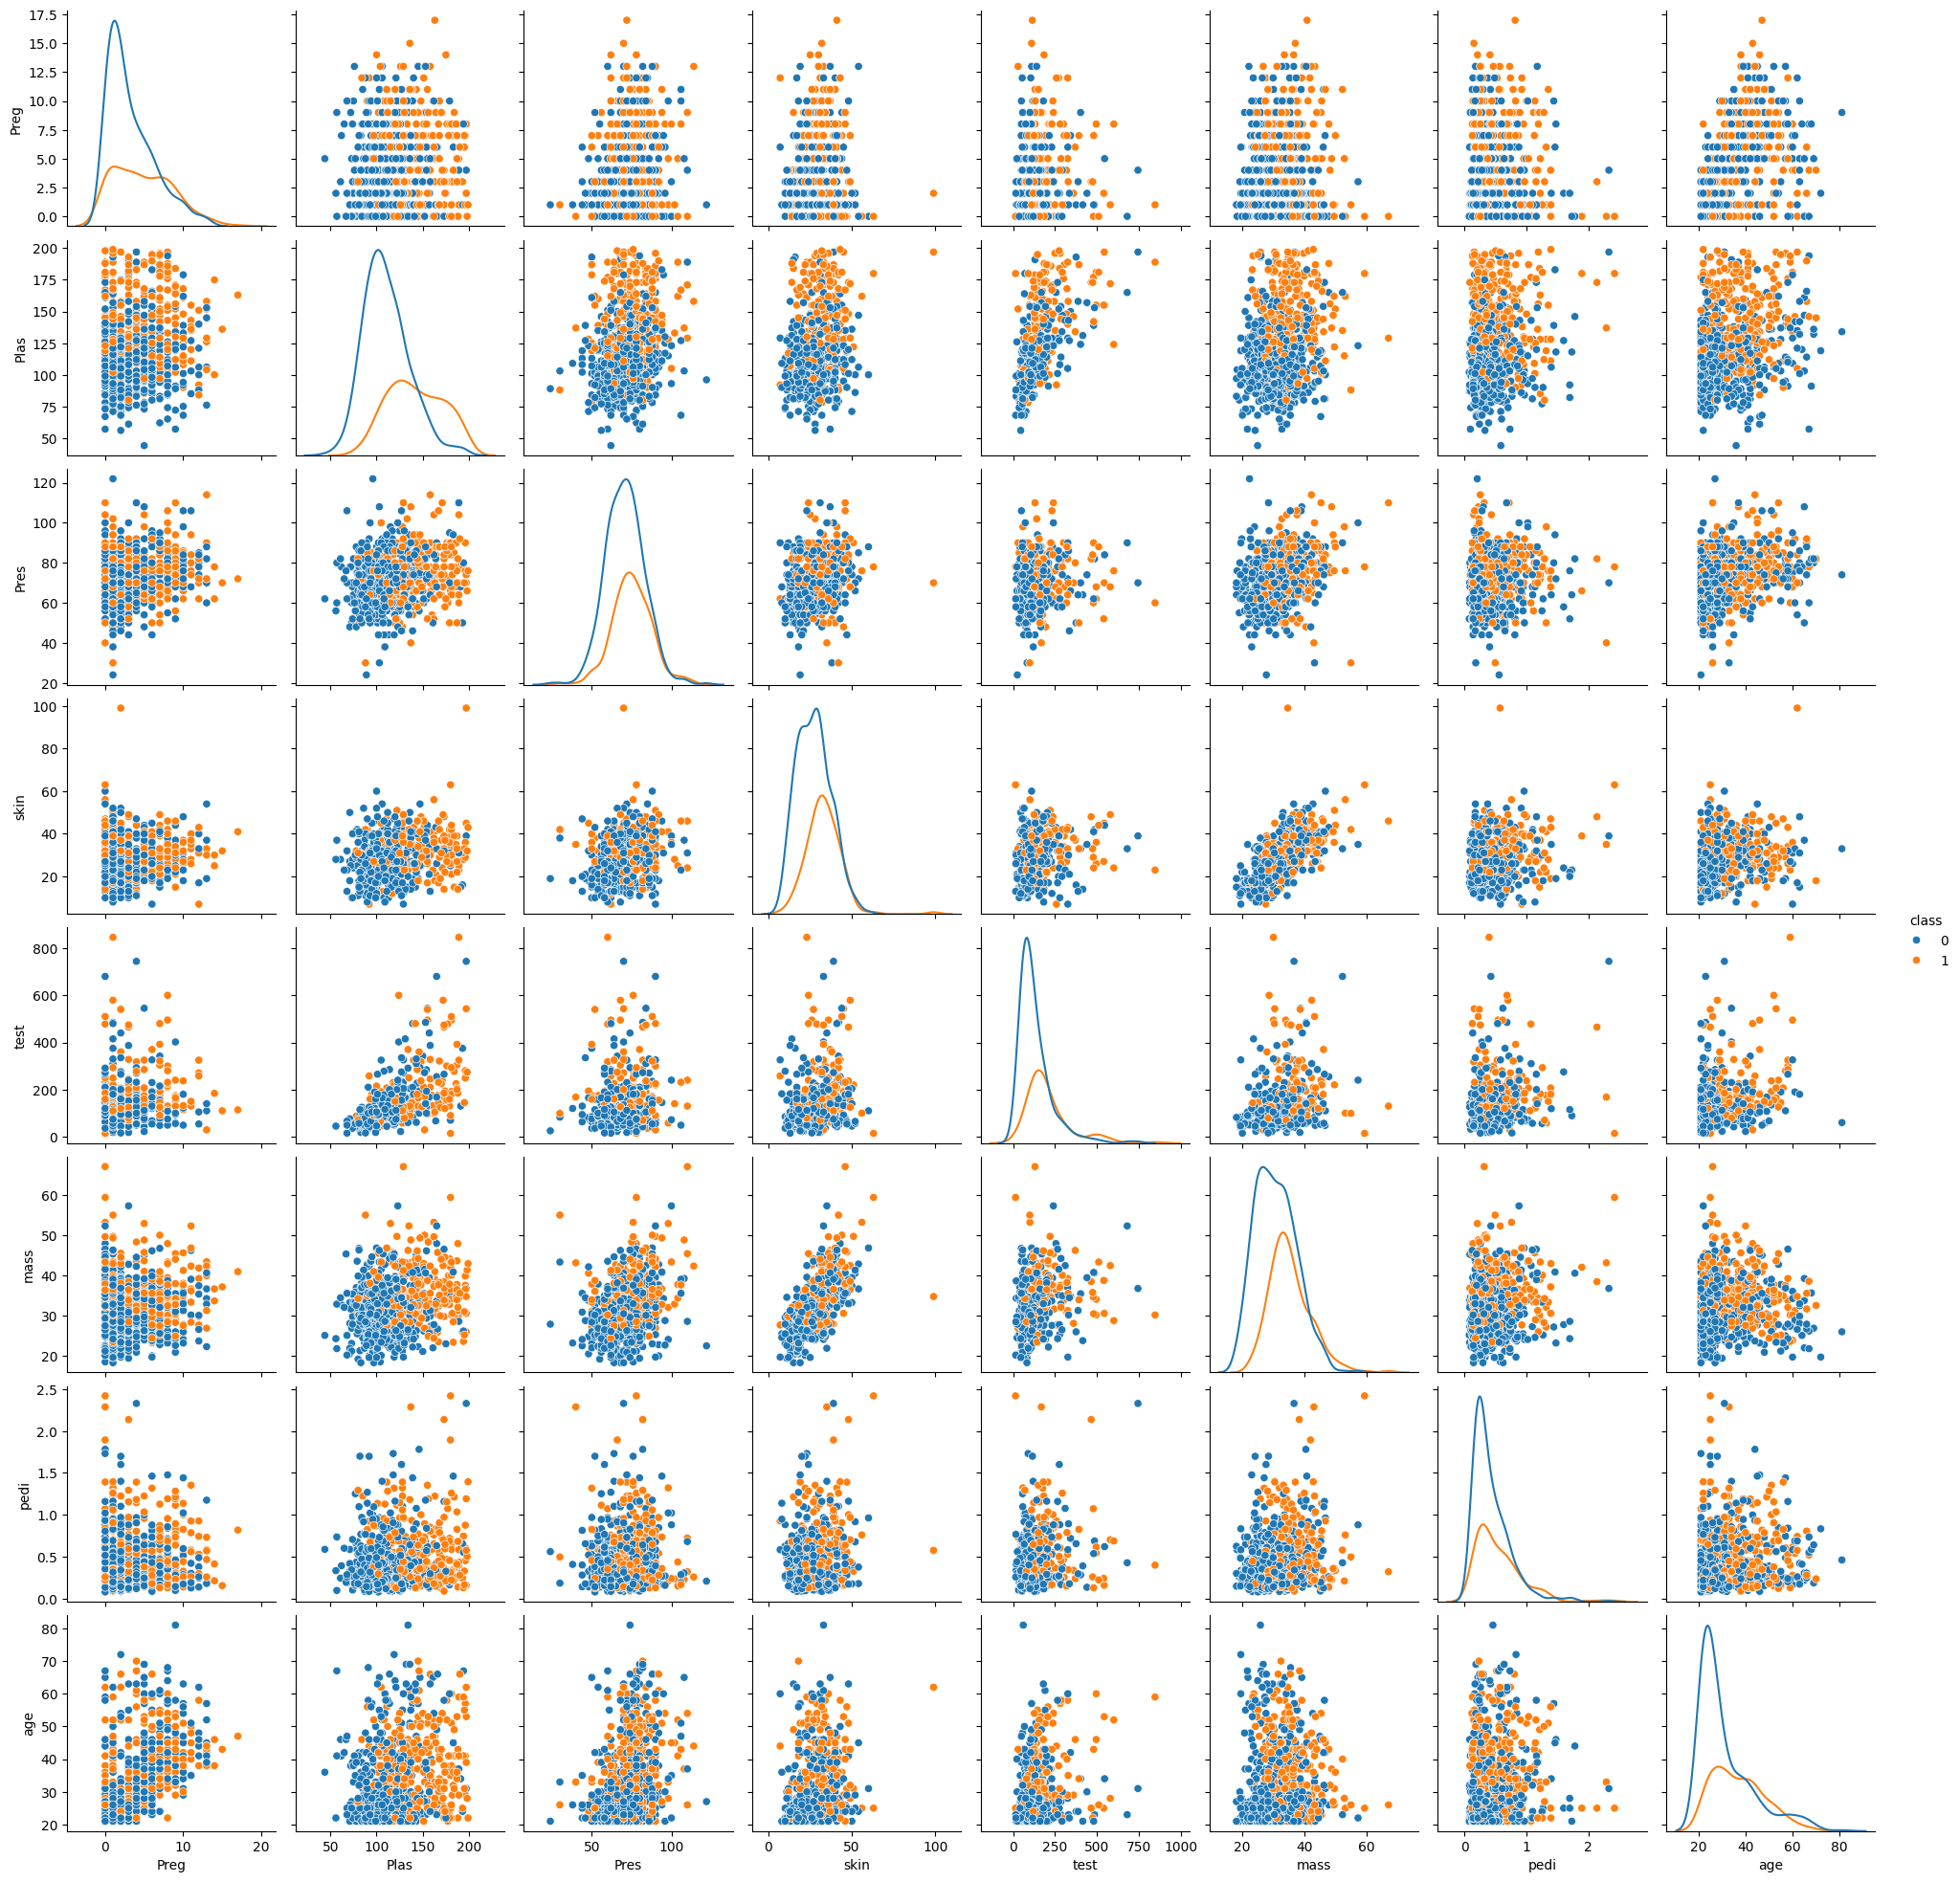

In [3]:
import seaborn as sns

sns.pairplot(pima_df , hue='class' , diag_kind = 'kde',diag_kws=dict(fill=False))
plt.show()

In [4]:
# split dataset into inputs and outputs
values = pima_df.values
X = values[:,0:8]
y = values[:,8]
# fill missing values with median column values
imputer = SimpleImputer(strategy='median', fill_value = 'numerical')
#transformed_X = imputer.fit_transform(X)

#Try following -

transformed_X = imputer.fit_transform(X)  # override default behavior to replace Nan with Median


In [5]:

test_size = 0.30 # taking 70:30 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = train_test_split(transformed_X, y, test_size=test_size, random_state=seed)



dt_model = DecisionTreeClassifier(criterion = 'entropy' )
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [6]:
dt_model.score(X_test , y_test)

0.7142857142857143

In [7]:
y_predict = dt_model.predict(X_test)
print(metrics.confusion_matrix(y_test, y_predict))

[[111  36]
 [ 30  54]]


# Let us regularize the tree

In [8]:
dt_model = DecisionTreeClassifier(criterion = 'entropy',  max_depth = 8)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=8)

In [9]:
dt_model.score(X_test , y_test)

0.7489177489177489

In [10]:
y_predict = dt_model.predict(X_test)
print(metrics.confusion_matrix(y_test, y_predict))

[[113  34]
 [ 24  60]]
